In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot configuration
%matplotlib inline
sns.set(style="whitegrid")

# Correct file path inside the folder
file_path = "DataSET Word Bank/3f23cc9f-8289-41b2-9e71-cc7ca62e82da_Data.csv"
df = pd.read_csv(file_path)

# 1. Remove rows that are completely empty
df.dropna(how='all', inplace=True)

# 2. Filter only data for Spain
df = df[df['Country Name'] == 'Spain']

# 3. Identify columns with years
year_columns = [col for col in df.columns if '[YR' in col]

# 4. Convert year columns to numeric values
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# 5. Fill missing values forward and backward
df[year_columns] = df[year_columns].ffill(axis=1).bfill(axis=1)

# 6. Remove rows that still have all year columns empty
df.dropna(subset=year_columns, how='all', inplace=True)

# 7. Reset the index
df.reset_index(drop=True, inplace=True)

# 8. Save the cleaned file
df.to_csv("cleaned_spain_data.csv", index=False)

print("✅ Data cleaned successfully. File saved as 'cleaned_spain_data.csv'.")



✅ Data cleaned successfully. File saved as 'cleaned_spain_data.csv'.


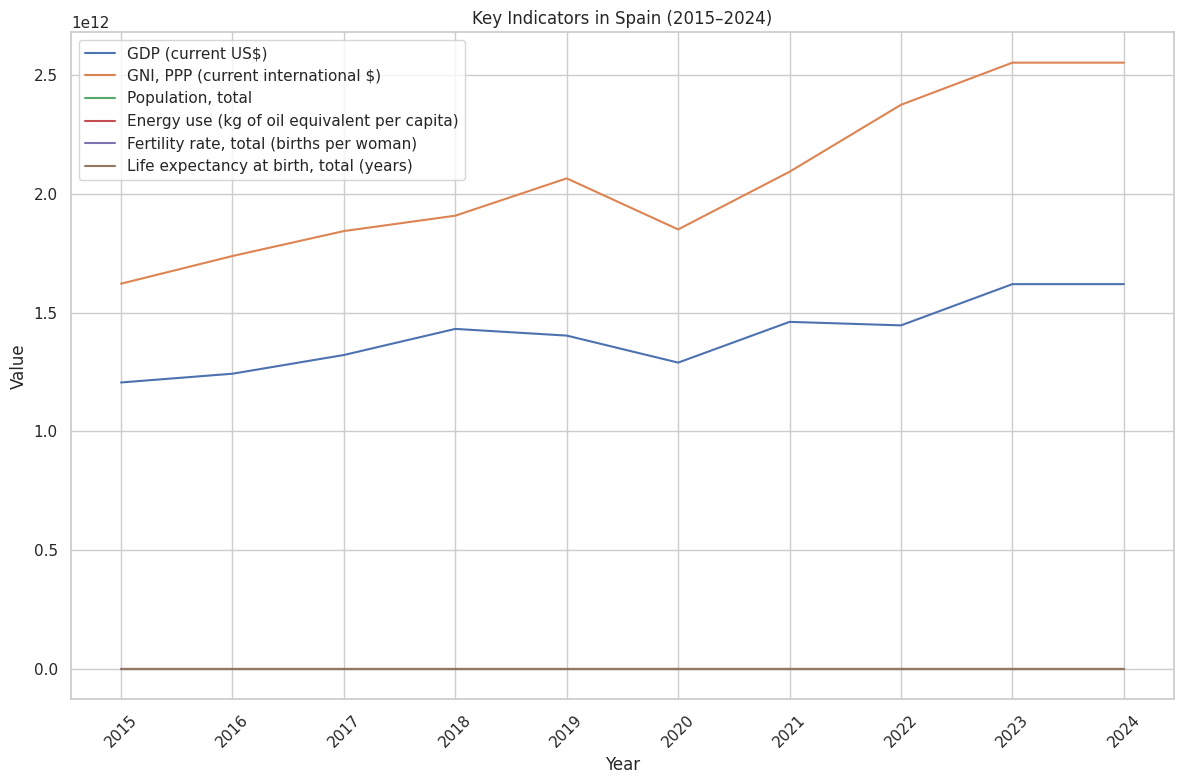

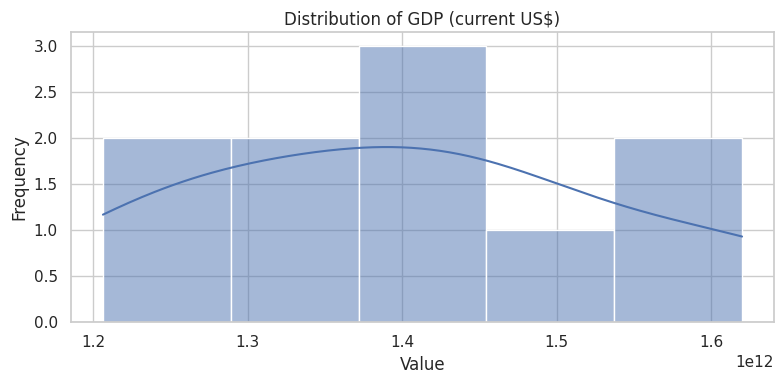

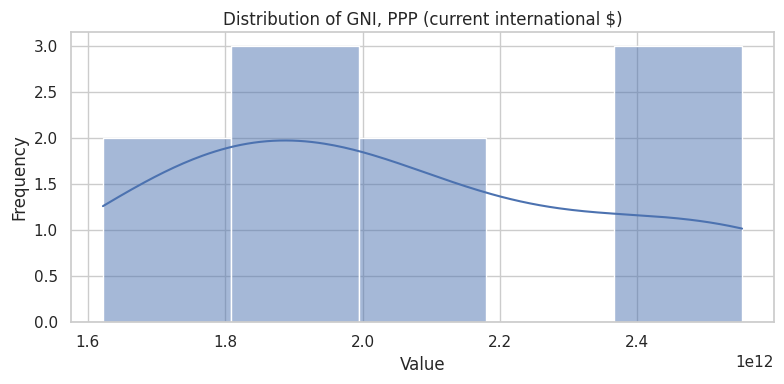

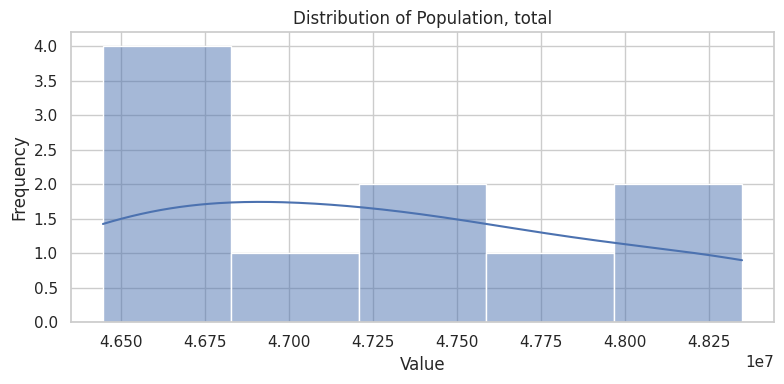

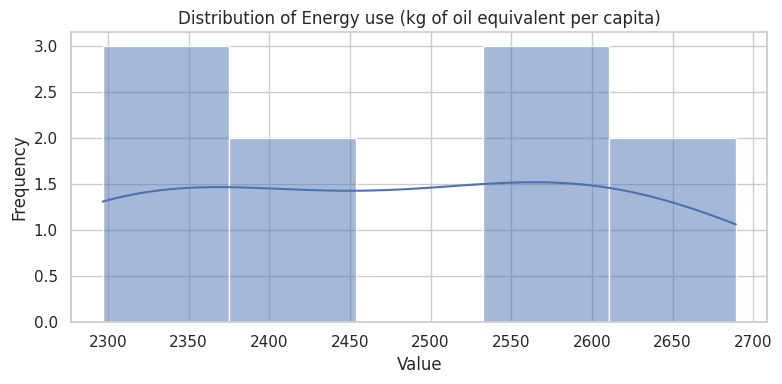

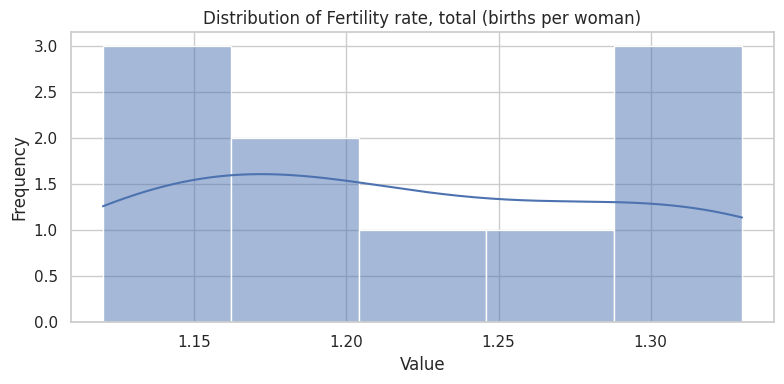

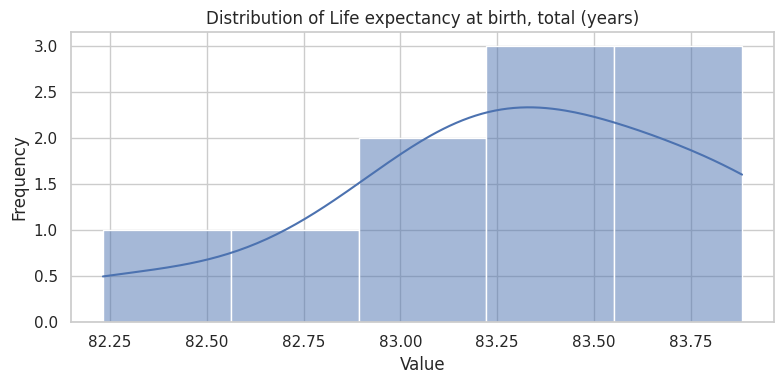

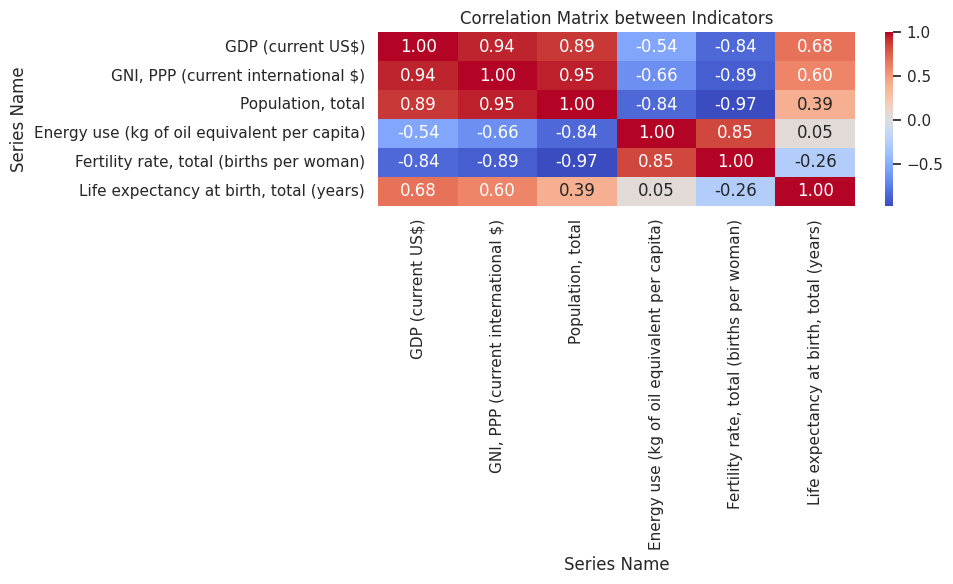

In [2]:
# Descriptive statistics by year
df_stats = df[year_columns].describe().transpose()
df_stats.head()

# Transpose for time series analysis
df_long = df.set_index('Series Name')[year_columns].transpose()
df_long.index = [col.split()[0] for col in year_columns]  # Clean year names
df_long.index.name = 'Year'

# Select key indicators
selected_indicators = [
    "GDP (current US$)",
    "GNI, PPP (current international $)",
    "Population, total",
    "Energy use (kg of oil equivalent per capita)",
    "Fertility rate, total (births per woman)",
    "Life expectancy at birth, total (years)"
]

# Trend plot
plt.figure(figsize=(12, 8))
for indicator in selected_indicators:
    if indicator in df_long.columns:
        sns.lineplot(data=df_long, x=df_long.index, y=df_long[indicator], label=indicator)

plt.title("Key Indicators in Spain (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Individual distributions
for indicator in selected_indicators:
    if indicator in df_long.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df_long[indicator].dropna(), kde=True)
        plt.title(f"Distribution of {indicator}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# Correlation matrix
correlation_matrix = df_long[selected_indicators].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Indicators")
plt.tight_layout()
plt.show()


✅ Model trained
R² Score: 0.8215
RMSE: 79,665,604,646.72


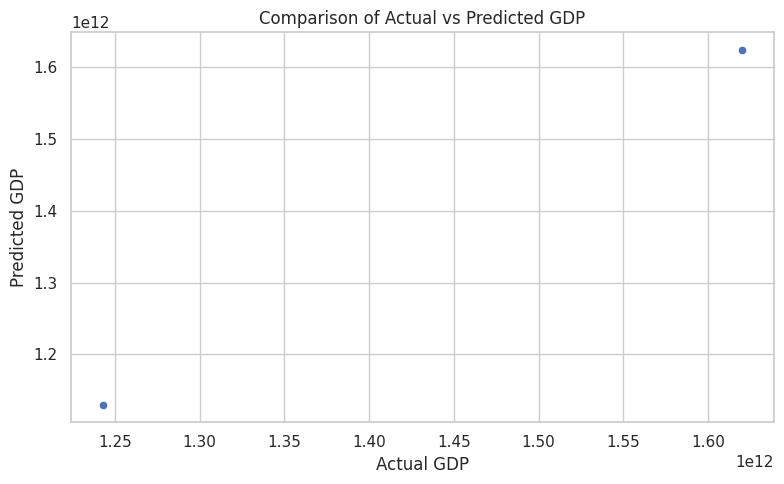

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Transpose the DataFrame to have years as rows and indicators as columns
df_transposed = df.set_index('Series Name')[year_columns].transpose()
df_transposed.index = [col.split()[0] for col in year_columns]  # Clean year names
df_transposed.index.name = 'Year'

# Drop years with missing GDP data
df_transposed = df_transposed.dropna(subset=["GDP (current US$)"])

# Define predictor variables (X) and target variable (y)
X = df_transposed.drop(columns=["GDP (current US$)"]).dropna(axis=1)
y = df_transposed["GDP (current US$)"]

# Align X and y
X = X.loc[y.index]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"✅ Model trained")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")

# Comparison plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Comparison of Actual vs Predicted GDP")
plt.tight_layout()
plt.show()

📈 Hypothetical scenario:
Predicted GDP: $4,370,354,054,333.03


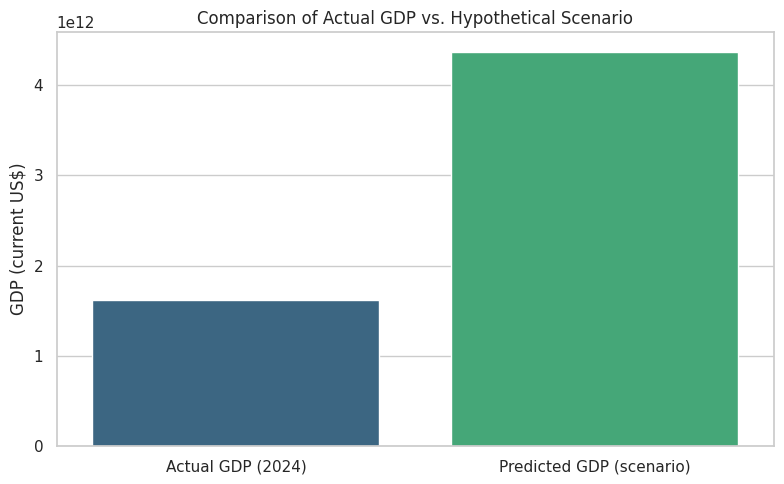

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transpose the DataFrame to have years as rows and indicators as columns
df_transposed = df.set_index('Series Name')[year_columns].transpose()
df_transposed.index = [col.split()[0] for col in year_columns]
df_transposed.index.name = 'Year'

# Remove years without GDP data
df_transposed = df_transposed.dropna(subset=["GDP (current US$)"])

# Define predictor variables (X) and target variable (y)
X = df_transposed.drop(columns=["GDP (current US$)"]).dropna(axis=1)
y = df_transposed["GDP (current US$)"]
X = X.loc[y.index]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Create a hypothetical scenario based on the last available year
scenario = X.iloc[-1].copy()

# Modify some key indicators
scenario["Population, total"] *= 1.05  # 5% increase in population
scenario["Energy use (kg of oil equivalent per capita)"] *= 0.95  # Improved energy efficiency
scenario["Life expectancy at birth, total (years)"] += 1  # Increase life expectancy by 1 year

# Predict GDP in the hypothetical scenario
predicted_gdp = model.predict(pd.DataFrame([scenario]))[0]

print("📈 Hypothetical scenario:")
print(f"Predicted GDP: ${predicted_gdp:,.2f}")

# Visual comparison
plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Actual GDP (2024)", "Predicted GDP (scenario)"],
    y=[y.iloc[-1], predicted_gdp],
    hue=["Actual GDP (2024)", "Predicted GDP (scenario)"],
    palette="viridis",
    legend=False
)
plt.title("Comparison of Actual GDP vs. Hypothetical Scenario")
plt.ylabel("GDP (current US$)")
plt.tight_layout()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Transpose the DataFrame to have years as rows and indicators as columns
df_transposed = df.set_index('Series Name')[year_columns].transpose()
df_transposed.index = [col.split()[0] for col in year_columns]
df_transposed.index.name = 'Year'

# Remove years without GDP data
df_transposed = df_transposed.dropna(subset=["GDP (current US$)"])

# Define predictor variables (X) and target variable (y)
X = df_transposed.drop(columns=["GDP (current US$)"]).dropna(axis=1)
y = df_transposed["GDP (current US$)"]
X = X.loc[y.index]

# --- Remove highly correlated variables (> 0.95) ---
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.95
high_corr_cols = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"🔍 Columns removed due to high correlation: {high_corr_cols}")
X = X.drop(columns=high_corr_cols)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=100.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    results[name] = {"R²": round(r2, 4), "RMSE": round(rmse, 2)}

# Display results
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)
print("📊 Model comparison:")
print(results_df)



🔍 Columns removed due to high correlation: ['Energy use (kg of oil equivalent per capita)', 'Fertility rate, total (births per woman)', 'Forest area (sq. km)', 'GNI, Atlas method (current US$)', 'GNI, PPP (current international $)', 'Inflation, GDP deflator (annual %)', 'Merchandise trade (% of GDP)', 'Mobile cellular subscriptions (per 100 people)', 'Mortality rate, under-5 (per 1,000 live births)', 'Personal remittances, received (current US$)', 'Population density (people per sq. km of land area)', 'Population, total', 'School enrollment, primary and secondary (gross), gender parity index (GPI)', 'School enrollment, secondary (% gross)', 'Surface area (sq. km)', 'Urban population growth (annual %)']
📊 Model comparison:
                       R²          RMSE
Linear Regression  0.9441  4.456704e+10
Ridge Regression   0.9345  4.826177e+10
Random Forest      0.8872  6.332967e+10


/opt/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
